In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
# use retina plots
%config InlineBackend.figure_format='retina'

In [3]:
%%time
# set experiment parameters
a0 = 1
b0 = 1
alpha = 0.05
n_experiments = 80
n_measurements = 100
theta = 0.51
thr = 0.9

# generate customer data
x = stats.bernoulli(theta).rvs([n_experiments, n_measurements]) # [n_experiments, n_measurements]
x_cumsum = np.cumsum(x, 1) # [n_experiments, n_measurements]

# compute posterior at each data point
n = np.repeat(np.arange(n_measurements)[None], n_experiments, 0) # [n_experiments, n_measurements]
p = stats.beta.cdf(0.5, a0 + x_cumsum, b0 + n - x_cumsum) # [n_experiments, n_measurements]

# map the posteriors to H0/H1
# - in one case, we only look at the posterior when the experiment is finished
# - in the other case, we look continuously
crosses_thr_end = p[:, -1] > thr
crosses_thr_any = np.any(p > thr, axis=1)

# print statistics
print('patient num. of positives: ', crosses_thr_end.mean())
print('peeking num. of positives: ', crosses_thr_any.mean())

patient num. of positives:  0.05
peeking num. of positives:  0.35
CPU times: user 2.18 ms, sys: 1.11 ms, total: 3.29 ms
Wall time: 3.29 ms


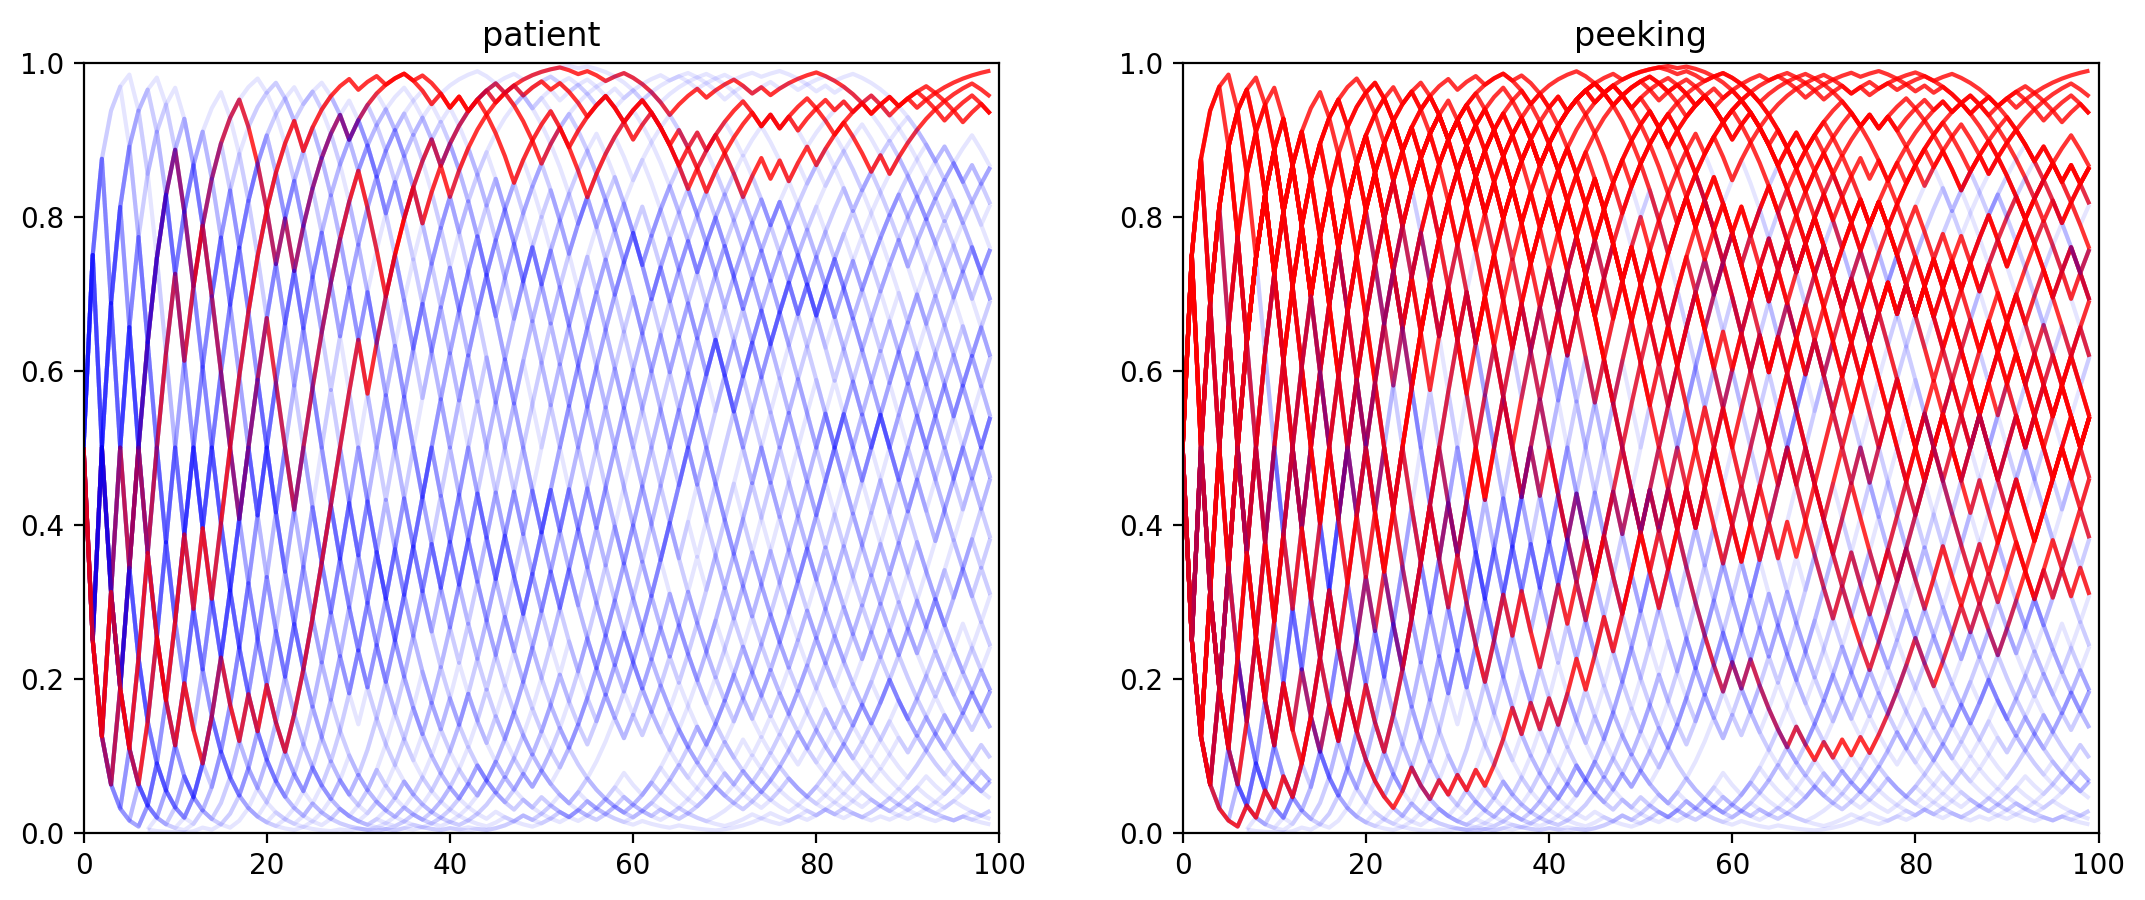

In [4]:
# color experiment outcomes based on wheter they predict H0 or H1
color_h1 = [1, 0, 0, 0.8]
color_h0 = [0, 0, 1, 0.1]

# plot experiment outcomes based on wheter we peek or not
lines = np.stack([n, p], -1)
fig, axs = plt.subplots(1, 2, figsize=[13, 5])
for i, crosses_thr, title in zip([0, 1], [crosses_thr_end, crosses_thr_any], ['patient', 'peeking']):
    colors = [color_h1 if b else color_h0 for b in crosses_thr]
    line_segments = LineCollection(lines, colors=colors)
    axs[i].add_collection(line_segments)
    axs[i].set_xlim(0, n_measurements)
    axs[i].set_ylim(0, 1)
    axs[i].set_title(title)    
plt.show()